In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("HeartDiseaseTrain-Test.csv")
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19728\2122059033.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


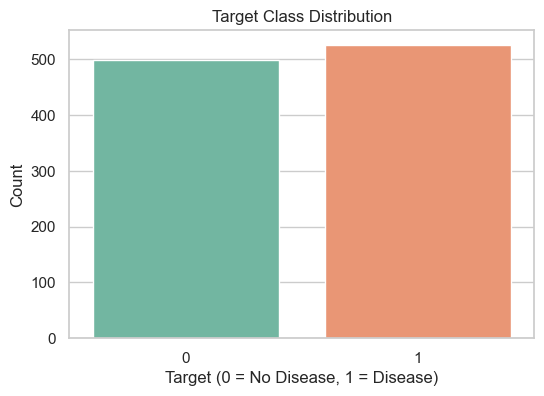

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set seaborn style
sns.set(style="whitegrid")

# Plot target class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Target Class Distribution')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()


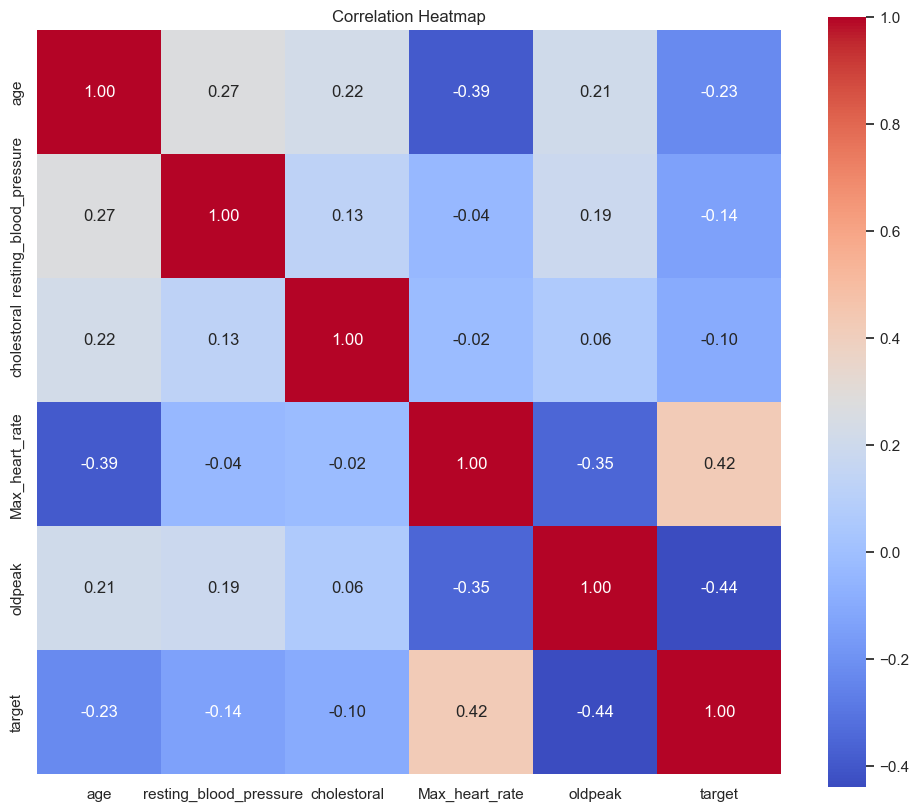

In [5]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [4]:
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [5]:
df['rest_ecg'].value_counts()

rest_ecg
ST-T wave abnormality           513
Normal                          497
Left ventricular hypertrophy     15
Name: count, dtype: int64

In [6]:
df['sex'].value_counts()

sex
Male      713
Female    312
Name: count, dtype: int64

In [7]:
df['chest_pain_type'].value_counts()

chest_pain_type
Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: count, dtype: int64

In [8]:
df['fasting_blood_sugar'].value_counts()

fasting_blood_sugar
Lower than 120 mg/ml      872
Greater than 120 mg/ml    153
Name: count, dtype: int64

In [9]:
# Seperating Dependent and independent features 
X = df.drop('target', axis=1)
y = df['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=24)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((717, 13), (308, 13), (717,), (308,))

In [11]:
numerical_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

print(f'Categorical Data : {categorical_features}')
print(f'Numerical Data : {numerical_features}')

Categorical Data : Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy',
       'thalassemia'],
      dtype='object')
Numerical Data : Index(['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
       'oldpeak'],
      dtype='object')


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

onehot_features = ['chest_pain_type', 'rest_ecg', 'thalassemia']
ordinal_features = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy']

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder(drop='first')
ore_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers = [
        ('Standard Scaler',numeric_transformer, numerical_features),
        ('OneHot Encoding',ohe_transformer, onehot_features),
        ('Ordinal Encoding',ore_transformer, ordinal_features),
    ]
)
preprocessor

ColumnTransformer(transformers=[('Standard Scaler', StandardScaler(),
                                 Index(['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
       'oldpeak'],
      dtype='object')),
                                ('OneHot Encoding', OneHotEncoder(drop='first'),
                                 ['chest_pain_type', 'rest_ecg',
                                  'thalassemia']),
                                ('Ordinal Encoding', OrdinalEncoder(),
                                 ['sex', 'fasting_blood_sugar',
                                  'exercise_induced_angina', 'slope',
                                  'vessels_colored_by_flourosopy'])])

In [13]:
X_train = preprocessor.fit_transform(X_train)

In [14]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.693518,-0.104073,0.180373,-0.000060,-0.906247,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0
1,0.959948,0.763602,-0.264650,-0.000060,1.102208,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,4.0
2,-0.583287,-0.682522,-1.135349,-0.472495,0.840236,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0
3,-0.473056,-0.682522,-0.051813,0.515324,0.054319,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
4,0.959948,-0.104073,0.141676,-0.128906,0.316291,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,1.841796,-1.145282,-1.889955,-1.073776,0.490939,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0
713,-0.252594,2.325416,-0.922512,0.515324,-0.469626,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0
714,1.400872,-0.971747,6.139823,0.429427,0.490939,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0
715,0.519024,0.185152,-0.245301,0.472375,-0.469626,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0


In [15]:
# Applying transformation on test data use transform
X_test = preprocessor.transform(X_test)

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score,recall_score, f1_score, \
    classification_report, accuracy_score,roc_auc_score, roc_curve

In [21]:
# Model Training 
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier())
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [23]:
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train,y_train_pred, average="weighted")
model_train_precision = precision_score(y_train,y_train_pred)
model_train_recall = recall_score(y_train,y_train_pred)
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test,y_test_pred, average="weighted")
model_test_precision = precision_score(y_test,y_test_pred)
model_test_recall = recall_score(y_test,y_test_pred)
model_test_rocauc_score = roc_auc_score(y_test_pred,y_test_pred)

print('Model Performance For Training Set')
print('- Accuracy : {:.4f}'.format(model_train_accuracy))
print('- F1 Score : {:.4f}'.format(model_train_f1))
print('- Precision : {:.4f}'.format(model_train_precision))
print('- Recall : {:.4f}'.format(model_train_recall))
print('- Roc Auc Score : {:.4f}'.format(model_train_rocauc_score))

print('------------------------------------')

print('Model Performance For Test Set')
print('- Accuracy : {:.4f}'.format(model_test_accuracy))
print('- F1 Score : {:.4f}'.format(model_test_f1))
print('- Precision : {:.4f}'.format(model_test_precision))
print('- Recall : {:.4f}'.format(model_test_recall))
print('- Roc Auc Score : {:.4f}'.format(model_test_rocauc_score))

print('='*35)

Model Performance For Training Set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
------------------------------------
Model Performance For Test Set
- Accuracy : 0.9903
- F1 Score : 0.9903
- Precision : 1.0000
- Recall : 0.9817
- Roc Auc Score : 1.0000


In [40]:
compare = pd.DataFrame({
    'y_test' : y_test,
    'y_pred' : y_test_pred
}).reset_index()
compare.head()

,index,y_test,y_pred
0,642,1,1
1,628,1,1
2,392,1,1
3,37,1,1
4,54,0,0


In [26]:
# Hyperparameter Tuning the model using gridsearchcv
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
    'estimator__max_depth': [1, 2, 3],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}
param_grid

{'n_estimators': [50, 100, 200],
 'learning_rate': [0.01, 0.1, 0.5, 1.0],
 'algorithm': ['SAMME', 'SAMME.R'],
 'estimator__max_depth': [1, 2, 3],
 'estimator__min_samples_split': [2, 5, 10],
 'estimator__min_samples_leaf': [1, 2, 4]}

In [29]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold()
grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='neg_log_loss', n_jobs=-1, cv=2, verbose=2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 648 candidates, totalling 1296 fits


GridSearchCV(cv=2,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'estimator__max_depth': [1, 2, 3],
                         'estimator__min_samples_leaf': [1, 2, 4],
                         'estimator__min_samples_split': [2, 5, 10],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_log_loss', verbose=2)

In [30]:
grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    min_samples_leaf=4),
                   learning_rate=0.01, n_estimators=200)

In [31]:
print(f'Best parameters : {grid.best_params_}')
print(f'Best score : {grid.best_score_}')

Best parameters : {'algorithm': 'SAMME', 'estimator__max_depth': 3, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 2, 'learning_rate': 0.01, 'n_estimators': 200}
Best score : -0.3699518345164492


In [33]:
y_pred_grid = grid.predict(X_test)

In [36]:
print("Accuracy :",accuracy_score(y_test, y_pred_grid))
print("F1 Score :",f1_score(y_test,y_pred_grid, average="weighted"))
print("Precision : ",precision_score(y_test,y_pred_grid))
print("Recall :",recall_score(y_test,y_pred_grid))
print("Roc Auc Score : ",roc_auc_score(y_test_pred,y_pred_grid))

Accuracy : 0.8733766233766234
F1 Score : 0.8730251274522357
Precision :  0.861271676300578
Recall : 0.9085365853658537
Roc Auc Score :  0.8811002661934338


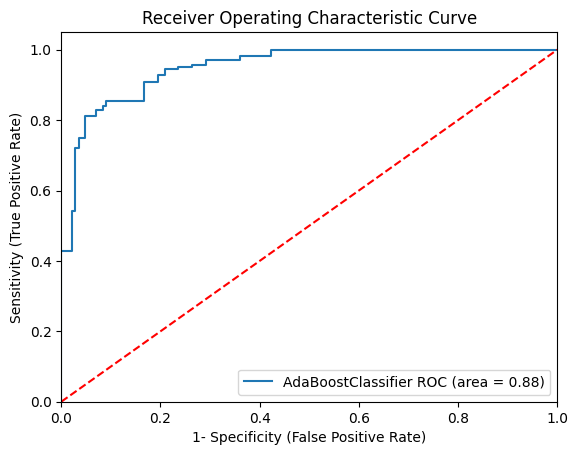

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
plt.figure()

fpr,tpr,thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:,1])

plt.plot(fpr,tpr, label='%s ROC (area = %0.2f)' % ('AdaBoostClassifier', 0.8811002661934338))

# Custom settings for the plot 
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1- Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.savefig('auc.png')
plt.show()

#✅ High Recall (0.91): The model rarely misses actual positive cases (e.g., patients with heart disease).

#✅ High Precision (0.86): Most predictions for disease are correct; few false alarms.

#✅ F1 Score (0.87): Balanced performance between false positives and false negatives.

#✅ ROC AUC (0.88): Strong class separability — it’s effective even under threshold shifts.

#Conclusion:

#Is well-tuned and highly effective for classification.

#Strikes a good balance between catching true cases (recall) and avoiding false alarms (precision).

#Is suitable for deployment or integration into a real-world decision-making system (like medical diagnostics), especially where missing a positive case is costly.